=== Recursive Binary Search Timing ===
Enter the size of the array: 100
Enter the element to search: 55

✅ Element found at index 55
⏱️ Time taken: 4.05 microseconds



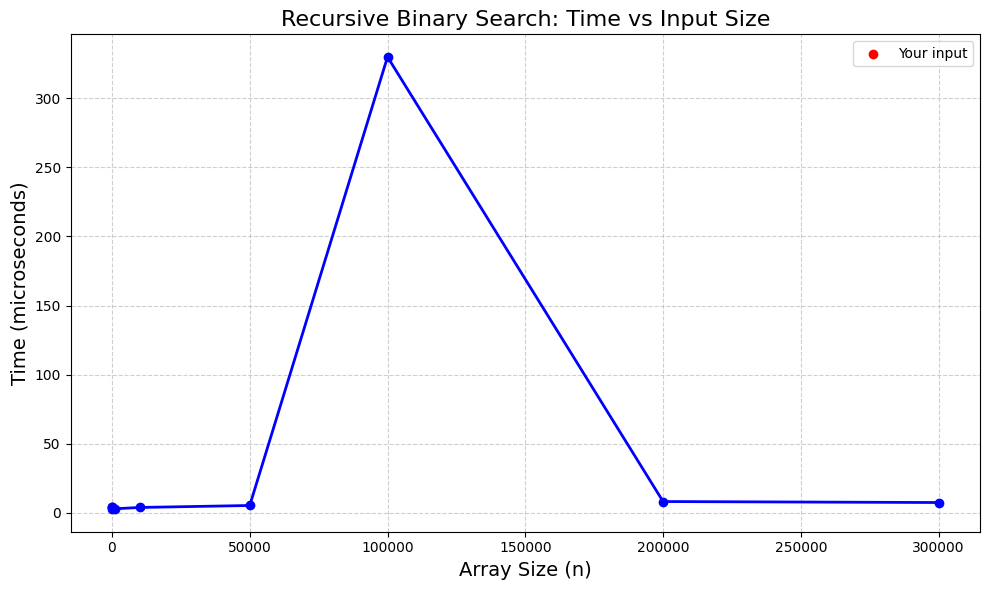

In [1]:
import time
import matplotlib.pyplot as plt

# Recursive Binary Search
def recursive_binary_search(arr, target, low, high):
    if low > high:
        return -1
    mid = (low + high) // 2
    if arr[mid] == target:
        return mid
    elif arr[mid] < target:
        return recursive_binary_search(arr, target, mid + 1, high)
    else:
        return recursive_binary_search(arr, target, low, mid - 1)

# Measure time for user's input
def search_and_measure_user_input():
    print("=== Recursive Binary Search Timing ===")
    n = int(input("Enter the size of the array: "))
    target = int(input("Enter the element to search: "))

    arr = list(range(n))  # Sorted array
    start_time = time.time()
    index = recursive_binary_search(arr, target, 0, n - 1)
    end_time = time.time()

    elapsed_time = (end_time - start_time) * 1e6  # microseconds
    if index != -1:
        print(f"\n✅ Element found at index {index}")
    else:
        print("\n❌ Element not found in the array.")
    print(f"⏱️ Time taken: {elapsed_time:.2f} microseconds\n")

    return n, elapsed_time

# Measure time for multiple sizes and plot
def plot_time_graph(user_n, user_time):
    ns = [10, 100, 1000, 10000, 50000, 100000, 200000, 300000]
    times = []

    for n in ns:
        arr = list(range(n))
        target = n - 1  # Worst-case
        start = time.time()
        recursive_binary_search(arr, target, 0, n - 1)
        end = time.time()
        elapsed = (end - start) * 1e6
        times.append(elapsed)

    # Add user's input
    ns.append(user_n)
    times.append(user_time)

    # Sort values for graph consistency
    combined = sorted(zip(ns, times))
    ns, times = zip(*combined)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(ns, times, marker='o', color='blue', linewidth=2)
    plt.scatter([user_n], [user_time], color='red', label='Your input')
    plt.title('Recursive Binary Search: Time vs Input Size', fontsize=16)
    plt.xlabel('Array Size (n)', fontsize=14)
    plt.ylabel('Time (microseconds)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run
user_n, user_time = search_and_measure_user_input()
plot_time_graph(user_n, user_time)
